In [2]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('E:\DataScience\ML\ML Projects\Deep Learning\Tweets.csv')

In [5]:
data = data[['text','airline_sentiment']]
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


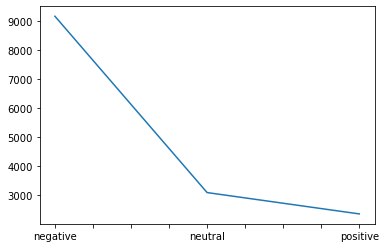

In [6]:
data.airline_sentiment.value_counts().plot()

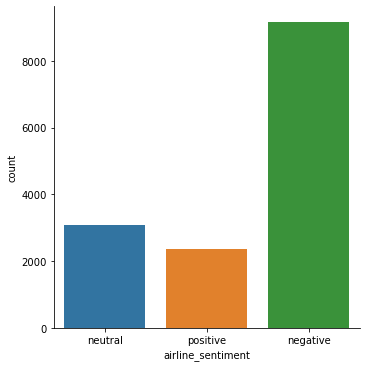

In [7]:
sns.catplot(data=data,x='airline_sentiment',kind='count')

In [ ]:
# for text in data['text']:
#     print(text)

In [8]:
import re
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
ps = PorterStemmer()

In [10]:
def clean_text(input):
    text1 = re.sub(r'https?://[^\s]+[\s]?','',input)
    text2 = re.sub(r'@\w+','',text1)
    text3 =re.sub(r'[0-9]+','',text2)
    p = string.punctuation
    t = str.maketrans(p,len(p)*' ')
    s = text3.translate(t) 
    
    stop_words = [w for w in stopwords.words('english') if w not in ['no','not']]
    words = word_tokenize(s)
    words = [w.lower() for w in words]
    words = [w for w in words if w not in stop_words and len(w)>1]
    
    stemmed_words = [ps.stem(word) for word in words] 
    return stemmed_words

In [11]:
data['text']=  data['text'].apply(clean_text)

In [13]:
data['text'] = data['text'].map(lambda t:' '.join(t))

In [14]:
data

,text,airline_sentiment
0,said,neutral
1,plu ad commerci experi tacki,positive
2,today must mean need take anoth trip,neutral
3,realli aggress blast obnoxi entertain guest fa...,negative
4,realli big bad thing,negative
...,...,...
14635,thank got differ flight chicago,positive
14636,leav minut late flight no warn commun minut la...,negative
14637,pleas bring american airlin blackberri,neutral
14638,money chang flight answer phone suggest make c...,negative


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.text)
sequences = tokenizer.texts_to_sequences(data.text)
feature_data = pad_sequences(sequences, maxlen=max_len)
print(feature_data)

[[   0    0    0 ...    0    0  133]
 [   0    0    0 ...  996  110 4283]
 [   0    0    0 ...   52   79  102]
 ...
 [   0    0    0 ...  396  333   29]
 [   0    0    0 ...  552   36 1377]
 [   0    0    0 ...   74  101    1]]


In [39]:
target_data = data.airline_sentiment.replace(['neutral','positive','negative'],[0,1,2])

In [40]:
target_data

0        0
1        1
2        0
3        2
4        2
        ..
14635    1
14636    2
14637    0
14638    2
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

In [41]:
data.airline_sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [53]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler()
feature_data,target_data = rs.fit_sample(feature_data,target_data)

In [59]:
target_data.value_counts()

2    9178
1    9178
0    9178
Name: airline_sentiment, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data)

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [56]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model1 = Sequential()
model1.add(layers.Embedding(max_words, 20)) 
model1.add(layers.LSTM(15,dropout=0.5)) 
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
y_test.shape

(3660, 3)

In [58]:
history = model1.fit(x_train, y_train, batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
646/646 [==============================] - 43s 66ms/step - loss: 0.8347 - accuracy: 0.6300 - val_loss: 0.6239 - val_accuracy: 0.7456
Epoch 2/5
646/646 [==============================] - 46s 71ms/step - loss: 0.5867 - accuracy: 0.7639 - val_loss: 0.5432 - val_accuracy: 0.7857
Epoch 3/5
646/646 [==============================] - 47s 72ms/step - loss: 0.5239 - accuracy: 0.7919 - val_loss: 0.5210 - val_accuracy: 0.7947
Epoch 4/5
646/646 [==============================] - 48s 74ms/step - loss: 0.4942 - accuracy: 0.8083 - val_loss: 0.5023 - val_accuracy: 0.8056
Epoch 5/5
646/646 [==============================] - 54s 84ms/step - loss: 0.4681 - accuracy: 0.8196 - val_loss: 0.4928 - val_accuracy: 0.8055
